Please note that `empty_sequence` uses the KL divergence with Barnes-Hut approximation (angle=0.5) by default.
distance(0.99, 0.0, 0.0, 0.0) = 5.2933048247244905
distance(0.999, 0.0, 0.0, 0.0) = 7.600402334500414
distance(0.9999, 0.0, 0.0, 0.0) = 9.903437551286448
distance(0.99999, 0.0, 0.0, 0.0) = 12.206067645522639
poincare_to_euclidean(0.0, 0.0) = (0.0, 0.0)
poincare_to_euclidean(0.0, 0.5) = (0.0, 1.0)
distance(0.0, 0.5, 0.0, 0.0) = 1.0986122886681096
poincare_to_euclidean(0.0, 0.8) = (0.0, 4.000000000000001)
distance(0.0, 0.8, 0.0, 0.0) = 2.1972245773362196
poincare_to_euclidean(0.5, 0.5) = (1.707106781186548, 1.707106781186548)
euclidian_to_poincare(0.5, 0.5) = (0.2928932188134525, 0.2928932188134525)
euclidian_to_poincare(poincare_to_euclidean(0.6, 0.3)) = (0.6000000000000001, 0.30000000000000004)
euclidian_to_poincare(poincare_to_euclidean(0.2, 0.3)) = (0.2, 0.3)
euclidian_to_poincare(poincare_to_euclidean(0.0, 0.9999)) = (0.0, 0.9999)
poincare_to_euclidean(euclidian_to_poincare

C:\Users\Milan\AppData\Local\Temp\ipykernel_21780\650008904.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(points[:, 0], points[:, 1],
C:\Users\Milan\AppData\Local\Temp\ipykernel_21780\650008904.py:42: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


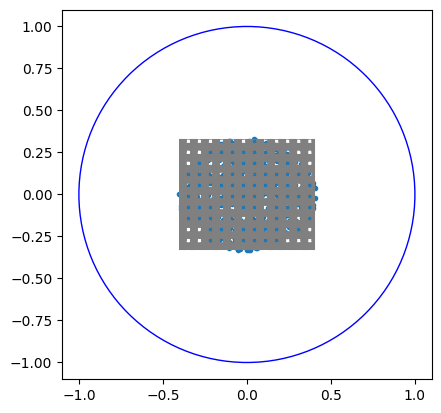

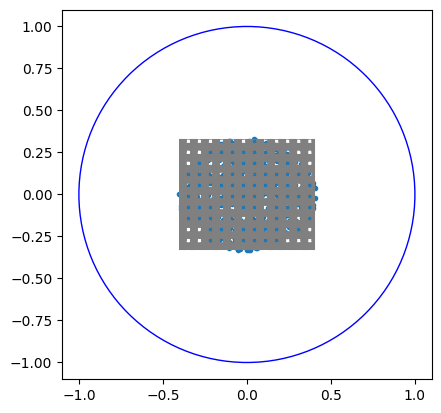

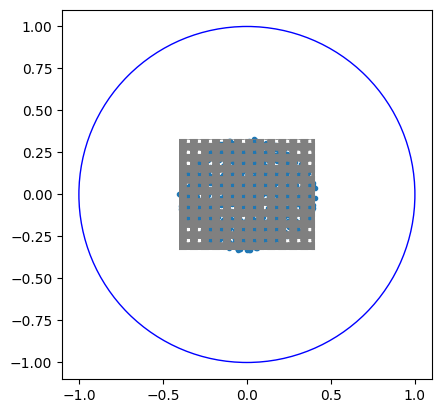

In [1]:
import hyperbolicTSNE.uniform_grid as grid
import numpy as np
from matplotlib import pyplot as plt
import time

def generate_points(n):
    points = []
    while len(points) < n:
        # Generate random x and y coordinates in the range (-1, 1)
        x = np.random.uniform(-1, 1)
        y = np.random.uniform(-1, 1)
        
        # Check if the point is within the unit circle
        if x**2*6 + y**2*9 < 0.9999:
            points.append([x, y])
    
    return np.array(points)

def plot_poincare(points, grid_n, x_min, width, y_min, height, labels=None):
    fig, ax = plt.subplots()
    

    ax.scatter(points[:, 0], points[:, 1],
               c=labels,
               marker=".",
               cmap="tab10")
    
    # Draw x grid lines
    for i in range(1, grid_n):
        x = [x_min, x_min + width]
        y = np.array([1.0, 1.0]) * (y_min + height * i / grid_n)
        ax.plot(x, y, color='gray', linestyle='--')

    # Draw y grid lines
    for i in range(1, grid_n):
        y = [y_min, y_min+height]
        x = np.array([1.0, 1.0]) * (x_min + width * i / grid_n)
        ax.plot(x, y, color='gray', linestyle='--')

    ax.add_patch(plt.Circle((0, 0), radius=1, edgecolor="b", facecolor="None"))
    ax.axis("square")
    fig.show()
    #fig.savefig(f"results/{dataset.name}.png")

def get_points_in_grid(points, indices, starts_counts, grid_index):
    start = starts_counts[grid_index*2]
    stride = starts_counts[grid_index*2+1]
    return points[indices[start : start+stride]]

def create_2d_array(points):
    # Calculate the length of the array
    n = len(points) // 2
    
    # Reshape the 1D array into a 2D array with 2 columns
    return np.reshape(points, (n, 2))

# Example usage:
n = 1000
points = generate_points(n)
#print("Generated points:")
#print(points)

print("distance(0.99, 0.0, 0.0, 0.0) =", grid.distance_py(0.99, 0.0, 0.0, 0.0))
print("distance(0.999, 0.0, 0.0, 0.0) =", grid.distance_py(0.999, 0.0, 0.0, 0.0))
print("distance(0.9999, 0.0, 0.0, 0.0) =", grid.distance_py(0.9999, 0.0, 0.0, 0.0))
print("distance(0.99999, 0.0, 0.0, 0.0) =", grid.distance_py(0.99999, 0.0, 0.0, 0.0))

print("poincare_to_euclidean(0.0, 0.0) =", grid.py_poincare_to_euclidean(0.0, 0.0))
print("poincare_to_euclidean(0.0, 0.5) =", grid.py_poincare_to_euclidean(0.0, 0.5))
print("distance(0.0, 0.5, 0.0, 0.0) =", grid.distance_py(0.0, 0.5, 0.0, 0.0))
print("poincare_to_euclidean(0.0, 0.8) =", grid.py_poincare_to_euclidean(0.0, 0.8))
print("distance(0.0, 0.8, 0.0, 0.0) =", grid.distance_py(0.0, 0.8, 0.0, 0.0))
print("poincare_to_euclidean(0.5, 0.5) =", grid.py_poincare_to_euclidean(0.5, 0.5))
print("euclidian_to_poincare(0.5, 0.5) =", grid.py_euclidean_to_poincare(0.5, 0.5))
ex, ey = grid.py_poincare_to_euclidean(0.6, 0.3)
print("euclidian_to_poincare(poincare_to_euclidean(0.6, 0.3)) =", grid.py_euclidean_to_poincare(ex, ey))
ex, ey = grid.py_poincare_to_euclidean(0.2, 0.3)
print("euclidian_to_poincare(poincare_to_euclidean(0.2, 0.3)) =", grid.py_euclidean_to_poincare(ex, ey))
ex, ey = grid.py_poincare_to_euclidean(0.0, 0.9999)
print("euclidian_to_poincare(poincare_to_euclidean(0.0, 0.9999)) =", grid.py_euclidean_to_poincare(ex, ey))
ex, ey = grid.py_euclidean_to_poincare(5.0, 17.5)
print("poincare_to_euclidean(euclidian_to_poincare(5.0, 17.5)) =", grid.py_poincare_to_euclidean(ex, ey))

grid_n = 100
grid_size = grid_n**2

start_time = time.time()

result_starts_counts, square_positions, x_min, width, y_min, height = grid.divide_points_over_grid(points, grid_n)

end_time = time.time()

execution_time = end_time - start_time
print("grid setup time:", execution_time, "seconds")

#x_values = range(len(max_distances))

# Plotting
#plt.plot(x_values, max_distances, marker='o', linestyle='-')
#plt.xlabel('Index')
#plt.ylabel('Max Distances')
#plt.title('Max Distances Plot')
#plt.grid(True)
#plt.show()


#grid.divide_points_over_grid(points, grid_size)
print("starts, counts:")
print(result_starts_counts)
print("positions:")
print(square_positions)


# Finding all points that would be checked for some location

checked_points = []

point_checking = [0.0, 0.0]

theta = 0.5
theta_sq = theta**2

grid_x = grid_n // 2
grid_y = grid_n // 2
squares_range = 1

# Calcuating in range exactly
if False:
    for dx in range(-squares_range,squares_range+1):
        for dy in range(-squares_range,squares_range+1):

            x = grid_x + dx;
            y = grid_y + dy;

            # Sampling grid square out of bounds
            if (x < 0 or x >= grid_n or y < 0 or y >= grid_n):
                continue

            k = y * grid_n + x;

            # Check all points in own square
            for j in range(result_starts_counts[k*2+0], result_starts_counts[k*2+0] + result_starts_counts[k*2+1]):
                index = result_indices[j]
                checked_points.append([points[index, 0], points[index, 1]])
            

# Looping over all grid squares
for k in range(grid_size):

    point_count = result_starts_counts[k*2+1]

    #max_square_dist = max_distances[k]
    #dist_to_square = grid.distance_py(point_checking[0], point_checking[1], square_positions[k*2 + 0], square_positions[k*2 + 1])
    #distances_to_grid_squares.append(dist_to_square)
    #ratios.append((max_square_dist*max_square_dist) / dist_to_square)

    k_grid_x = k % grid_n;
    k_grid_y = int(k / grid_n);
    
    #if ((abs(k_grid_x - grid_x) > squares_range or abs(k_grid_y - grid_y) > squares_range)):
    # If the square error is relatively small, compute using only the square average
    #if (max_square_dist < theta_sq * dist_to_square):
    checked_points.append([square_positions[k*2 + 0], square_positions[k*2 + 1]])
        
        # Move on to next grid square
        #continue
   

if False:
    x_values = range(len(distances_to_grid_squares))

    # Plotting
    plt.plot(x_values, np.array(distances_to_grid_squares), marker='o', linestyle='-')
    plt.xlabel('Index')
    plt.ylabel('Distances to grid squares')
    plt.title('Distances to grid squares')
    plt.grid(True)
    plt.show()

    x_values = range(len(ratios))

    # Plotting
    plt.plot(x_values, np.array(ratios), marker='o', linestyle='-')
    plt.xlabel('Index')
    plt.ylabel('Distance ratio')
    plt.title('Distance ratios plot')
    plt.grid(True)
    plt.show()

    plt.imshow(np.reshape(max_distances, (grid_n, grid_n)), cmap='viridis')  # Change the colormap if needed
    plt.colorbar()
    plt.title('Maximum distances')
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')
    plt.show()

    plt.imshow(np.reshape(distances_to_grid_squares, (grid_n, grid_n)), cmap='viridis')  # Change the colormap if needed
    plt.colorbar()
    plt.title('Distance to point sampling')
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')
    plt.show()

plot_poincare(create_2d_array(square_positions), grid_n, x_min, width, y_min, height)

plot_poincare(np.array(checked_points), grid_n, x_min, width, y_min, height)

plot_poincare(points, grid_n, x_min, width, y_min, height)
#plot_poincare(get_points_in_grid(points, result_indices, result_starts_counts, 80), grid_n, x_min, width, y_min, height)
